In [5]:
import os
print(os.getcwd())  # Affiche le répertoire de travail actuel

/kaggle/working


In [6]:
# Installer Kaggle (si nécessaire)
!pip install kaggle

# Charger un fichier Kaggle exporté (à placer dans le répertoire de travail)
import pandas as pd

# Remplacer 'data.csv' par le nom du fichier téléchargé
data = pd.read_csv("/kaggle/input/tweets-dataset/tweets.csv", encoding="latin-1")

# Aperçu des premières lignes
data.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now ðð» https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! ðð»ð...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [7]:
print(data.columns)

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')


In [9]:
print(data.dtypes)  # Vérifier les types de données des colonnes

author               object
content              object
country              object
date_time            object
id                  float64
language             object
latitude            float64
longitude           float64
number_of_likes       int64
number_of_shares      int64
dtype: object


In [10]:
import pandas as pd

# Définir les noms des colonnes
columns = ['author', 'content', 'country', 'date_time', 'id','language','latitude','longitude','number_of_likes','number_of_shares']

# Charger le fichier CSV avec les noms de colonnes et spécifier l'encodage
data = pd.read_csv("/kaggle/input/tweets-dataset/tweets.csv", names=columns, header=None, encoding='latin-1')

# Vérifiez les colonnes après chargement
print(data.columns)

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')


In [11]:
print(data.head(5000))  

             author                                            content  \
0            author                                            content   
1         katyperry  Is history repeating itself...?#DONTNORMALIZEH...   
2         katyperry  @barackobama Thank you for your incredible gra...   
3         katyperry                Life goals. https://t.co/XIn1qKMKQl   
4         katyperry      Me right now ðð» https://t.co/gW55C1wrwd   
...             ...                                                ...   
4995  taylorswift13  Praying for Paris. Our hearts are breaking for...   
4996  taylorswift13  Farewell, Shanghai!! \r\nð https://t.co/UOw...   
4997  taylorswift13  I loved playing Shanghai last night-- so stoke...   
4998  taylorswift13  @NRJhitmusiconly Merci!!!! ð«ð·ð«ð·ð...   
4999  taylorswift13  Congratulations on your CMA wins @KeithUrban @...   

      country         date_time           id  language  latitude  longitude  \
0     country         date_time 

<h1>Classification des Tweets</h1>


<h2>1.Prétraitement des tweets</h2>

<h3>Nettoyer les tweets en supprimant les hashtags, mentions, URLs, et autres caractères inutiles.</h3> 

In [12]:
import re

def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Supprimer les mentions
    text = re.sub(r'#\w+', '', text)  # Supprimer les hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Supprimer les URLs
    return text.strip()

data['cleaned_content'] = data['content'].apply(clean_text)

In [13]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer les caractères spéciaux
    return text.strip()

data['cleaned_content'] = data['content'].apply(clean_text)

In [14]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text).strip()  # Supprimer les espaces multiples
    return text.strip()

data['cleaned_content'] = data['content'].apply(clean_text)

In [16]:
import re

def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    return text.strip()

data['cleaned_content'] = data['content'].apply(clean_text)

<h3>Traitement des tweets avec NLTK</h3>

<h4>Transformer les tweets nettoyés en ensembles de mots (tokens).</h4>

<h4>Effectuer une analyse en respectant les étapes de base du NLP :</h4>

<h6>Tokenisation</h6>

<h6>Suppression des mots vides</h6>

<h6>Stemmatisation (réduction à la racine des mots)</h6>

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk
print("NLTK est prêt à être utilisé !")

NLTK est prêt à être utilisé !


<h5>importer les modules nécessaires</h5>

<h5>téléchargé les ressources nécessaires dans NLTK pour la tokenisation, les stopwords, et la lemmatisation :</h5>

In [19]:
nltk.download('punkt')  # Tokenizer pour découper le texte en mots ou phrases
nltk.download('stopwords')  # Stop-words pour le nettoyage des textes
nltk.download('wordnet')  # Lemmatiseur

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h1>2.Suppression des stopwords : On filtre les mots courants comme "the", "is", "and" qui n'apportent pas d’information utile pour l’analyse.</h1>

In [22]:
# Importer les modules nécessaires
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Télécharger les ressources nécessaires
nltk.download('punkt')         # Pour la tokenisation
nltk.download('stopwords')     # Pour les stopwords
nltk.download('wordnet')       # Pour la lemmatisation

# Initialiser les outils de nettoyage
stop_words = set(stopwords.words('english'))  # Ou 'french' pour les tweets en français
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>1.Tokenisation : La fonction word_tokenize() découpe le texte en mots (ou tokens).</h1>

In [23]:
import re
from nltk.tokenize import word_tokenize
import nltk

# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt')

# Fonction de nettoyage
def preprocess_tweet(tweet):
    # Supprimer les mentions, hashtags, URLs et caractères non alphabétiques
    tweet = re.sub(r"@\w+|#\w+|http\S+|[^a-zA-Z\s]", "", tweet)
    tweet = tweet.lower()  # Convertir en minuscules
    return tweet

# Appliquer le prétraitement sur les 5000 premiers tweets
data_subset = data.head(5000).copy()
data_subset['cleaned_text'] = data_subset['content'].apply(preprocess_tweet)

# Vérifier les résultats
print(data_subset[['content', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                                             content  \
0                                            content   
1  Is history repeating itself...?#DONTNORMALIZEH...   
2  @barackobama Thank you for your incredible gra...   
3                Life goals. https://t.co/XIn1qKMKQl   
4      Me right now ðð» https://t.co/gW55C1wrwd   

                                        cleaned_text  
0                                            content  
1                       is history repeating itself   
2   thank you for your incredible grace in leader...  
3                                        life goals   
4                                     me right now    


In [24]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Télécharger les mots vides en anglais
nltk.download('stopwords')

# Charger la liste des mots vides
stop_words = set(stopwords.words("english"))

# Initialiser le stemmer
stemmer = PorterStemmer()

# Fonction pour appliquer le traitement NLP
def process_tweet(tweet):
    tokens = word_tokenize(tweet)  # Tokenisation
    tokens = [word for word in tokens if word not in stop_words]  # Supprimer les mots vides
    tokens = [stemmer.stem(word) for word in tokens]  # Stemmatisation
    return tokens

# Appliquer le traitement NLP
data_subset['processed_tokens'] = data_subset['cleaned_text'].apply(process_tweet)

# Vérifier les résultats
print(data_subset[['cleaned_text', 'processed_tokens']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                        cleaned_text  \
0                                            content   
1                       is history repeating itself    
2   thank you for your incredible grace in leader...   
3                                        life goals    
4                                     me right now     

                             processed_tokens  
0                                   [content]  
1                           [histori, repeat]  
2  [thank, incred, grace, leadership, except]  
3                                [life, goal]  
4                                     [right]  


In [20]:
print(data.columns)


Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares',
       'cleaned_content'],
      dtype='object')


In [21]:
import re
import string

# Fonction de nettoyage améliorée
def clean_tweet(tweet):
    # Supprimer les mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Supprimer les hashtags (#)
    tweet = re.sub(r'#\w+', '', tweet)
    # Supprimer les URLs
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)
    # Supprimer les caractères non-ASCII (emojis, etc.)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    # Supprimer la ponctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Convertir en minuscules
    tweet = tweet.lower()
    return tweet

# Appliquer la fonction de nettoyage à la colonne `content`
data['cleaned_content'] = data['content'].apply(clean_tweet)


In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Initialiser les outils
stop_words = set(stopwords.words('english'))  # Utilisez 'french' si nécessaire
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Fonction de traitement NLP
def process_tweet(tweet):
    # Tokenisation
    tokens = word_tokenize(tweet)
    # Suppression des stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming ou lemmatisation (au choix)
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

# Appliquer la fonction de traitement NLP
data['processed_text'] = data['cleaned_content'].apply(process_tweet)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2>1. Displaying the Data in a Table(original tweet, cleaned tweet, and processed tweet)</h2>

In [23]:
import IPython.display as display
from IPython.core.display import HTML

# Fonction pour afficher les tweets sous forme de tableau HTML
def display_colored_tweets(data):
    html = "<table style='width:100%; border-collapse: collapse;'>"
    html += "<tr><th style='text-align:left;'>Tweet Original</th><th style='text-align:left;'>Tweet Nettoyé</th><th style='text-align:left;'>Tweet Traité</th></tr>"
    
    for index, row in data.iterrows():
        original_tweet = f"<td style='background-color: #f2f2f2; padding: 8px;'>{row['content']}</td>"
        cleaned_tweet = f"<td style='background-color: #77b5fe; padding: 8px;'>{row['cleaned_content']}</td>"
        processed_tweet = f"<td style='background-color: #f0e68c; padding: 8px;'>{row['processed_text']}</td>"
        html += f"<tr>{original_tweet}{cleaned_tweet}{processed_tweet}</tr>"
    
    html += "</table>"
    display.display(HTML(html))

# Afficher les 5 premières lignes du DataFrame sous forme de tableau
display_colored_tweets(data.head())


Tweet Original,Tweet Nettoyé,Tweet Traité
content,content,content
Is history repeating itself...?#DONTNORMALIZEHATE https://t.co/ngG11quhmK,is history repeating itself,histori repeat
@barackobama Thank you for your incredible grace in leadership and for being an exceptionalâ¦ https://t.co/ZuQLZpt6df,thank you for your incredible grace in leadership and for being an exceptional,thank incred grace leadership except
Life goals. https://t.co/XIn1qKMKQl,life goals,life goal
Me right now ðð» https://t.co/gW55C1wrwd,me right now,right


<h6>Le TF-IDF convertit chaque tweet en un vecteur numérique, où chaque dimension représente la pertinence d'un mot dans le tweet. L'algorithme K-Means est ensuite utilisé pour regrouper les tweets en k clusters. Plusieurs valeurs de k sont testées pour identifier celle qui minimise l'inertie (la distance intra-cluster). Après avoir déterminé la valeur optimale de k, K-Means est appliqué, et chaque tweet est assigné à un cluster spécifique.</h6>

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Utilisation de TF-IDF pour transformer les tweets en vecteurs
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(data['cleaned_content'])

# Afficher les dimensions de la matrice TF-IDF (n_samples, n_features)
print(X.shape)  # (Nombre de tweets, Nombre de caractéristiques)

(52543, 14288)


<h1>Classification des tweets avec K-Means</h1>

<h4>Utiliser les tokens pour regrouper les tweets similaires en clusters.</h4>

<h4>Calculer la distance de Jaccard pour mesurer la similarité entre deux ensembles de mots.</h4>

<h3>K= 5</h3>

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


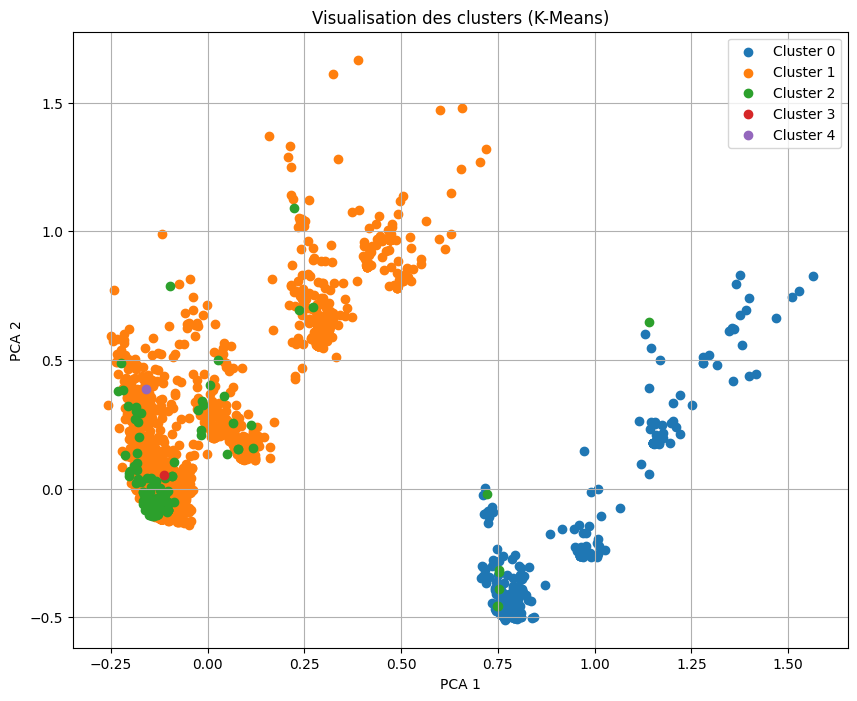

In [32]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fonction pour convertir les tokens en vecteurs binaires
def tokens_to_vector(tokens, vocabulary):
    return [1 if word in tokens else 0 for word in vocabulary]

# Construire le vocabulaire unique
vocabulary = set(word for tokens in data_subset['processed_tokens'] for word in tokens)

# Convertir les tweets en vecteurs binaires
vectors = np.array([tokens_to_vector(tokens, vocabulary) for tokens in data_subset['processed_tokens']])

# Appliquer K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Tester avec 5 clusters
data_subset['cluster'] = kmeans.fit_predict(vectors)

# Réduction de dimension pour la visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualisation des clusters K-Means
plt.figure(figsize=(10, 8))
for cluster in range(kmeans.n_clusters):
    cluster_points = reduced_vectors[data_subset['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# Personnalisation de la courbe
plt.title("Visualisation des clusters (K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()

<h4>Pour K=3</h4>

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


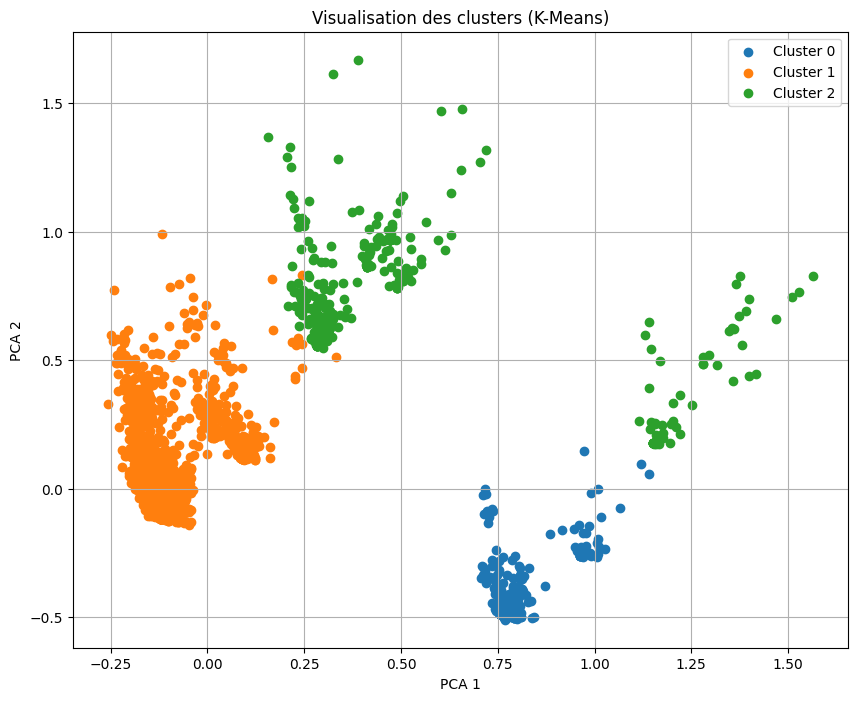

In [33]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fonction pour convertir les tokens en vecteurs binaires
def tokens_to_vector(tokens, vocabulary):
    return [1 if word in tokens else 0 for word in vocabulary]

# Construire le vocabulaire unique
vocabulary = set(word for tokens in data_subset['processed_tokens'] for word in tokens)

# Convertir les tweets en vecteurs binaires
vectors = np.array([tokens_to_vector(tokens, vocabulary) for tokens in data_subset['processed_tokens']])

# Appliquer K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Tester avec 5 clusters
data_subset['cluster'] = kmeans.fit_predict(vectors)

# Réduction de dimension pour la visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualisation des clusters K-Means
plt.figure(figsize=(10, 8))
for cluster in range(kmeans.n_clusters):
    cluster_points = reduced_vectors[data_subset['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# Personnalisation de la courbe
plt.title("Visualisation des clusters (K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()

<h4>Pour k=10</h4>

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


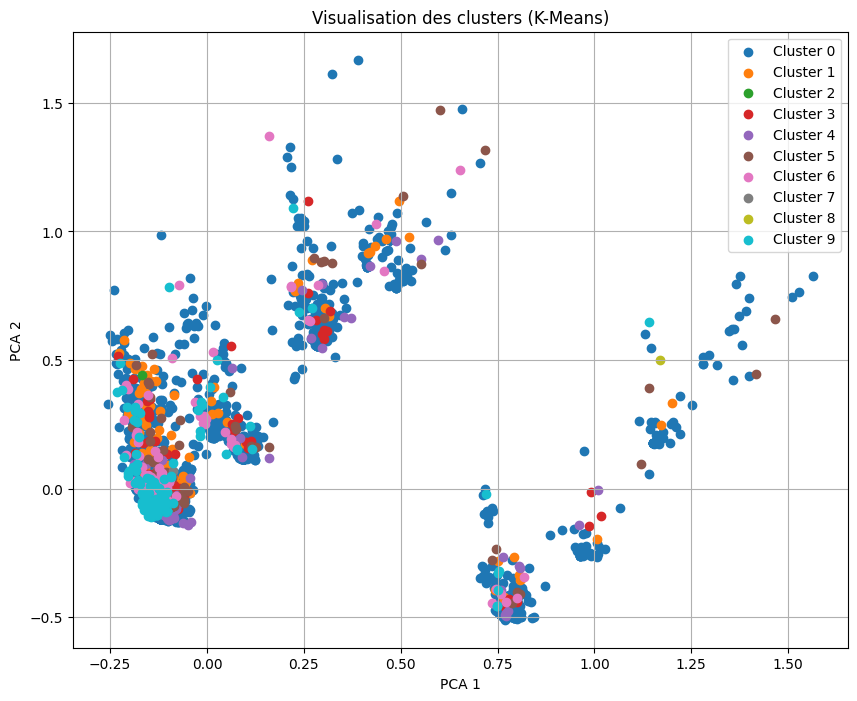

In [34]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fonction pour convertir les tokens en vecteurs binaires
def tokens_to_vector(tokens, vocabulary):
    return [1 if word in tokens else 0 for word in vocabulary]

# Construire le vocabulaire unique
vocabulary = set(word for tokens in data_subset['processed_tokens'] for word in tokens)

# Convertir les tweets en vecteurs binaires
vectors = np.array([tokens_to_vector(tokens, vocabulary) for tokens in data_subset['processed_tokens']])

# Appliquer K-Means
kmeans = KMeans(n_clusters=10, random_state=42)  # Tester avec 5 clusters
data_subset['cluster'] = kmeans.fit_predict(vectors)

# Réduction de dimension pour la visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualisation des clusters K-Means
plt.figure(figsize=(10, 8))
for cluster in range(kmeans.n_clusters):
    cluster_points = reduced_vectors[data_subset['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# Personnalisation de la courbe
plt.title("Visualisation des clusters (K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()

<h3>Classification avec Fuzzy C-Means</h3>

In [35]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.4 MB/s eta 0:00:00a 0:00:01


<h5>Pour c=5</h5>

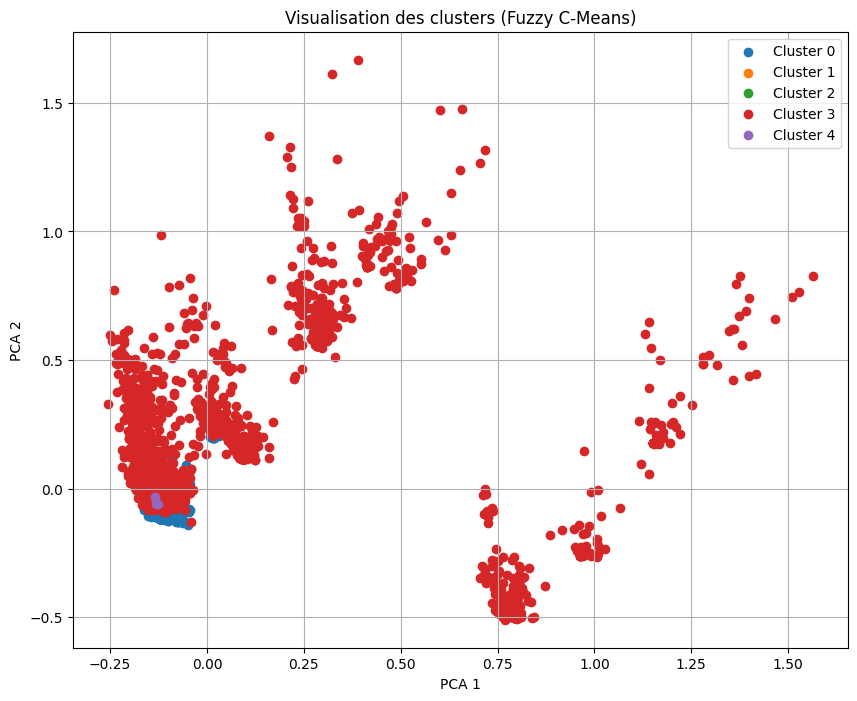

In [36]:
import skfuzzy as fuzz

# Appliquer Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=vectors.T,  # Les vecteurs doivent être transposés
    c=5,             # Nombre de clusters
    m=2,             # Paramètre de flou
    error=0.005,     # Seuil d'erreur
    maxiter=1000,    # Nombre maximal d'itérations
    seed=42
)

# Affecter chaque tweet au cluster avec la probabilité la plus élevée
data_subset['fuzzy_cluster'] = np.argmax(u, axis=0)

# Visualisation des clusters Fuzzy C-Means
plt.figure(figsize=(10, 8))
for cluster in range(5):  # Remplacez "5" par le nombre de clusters Fuzzy C-Means
    cluster_points = reduced_vectors[data_subset['fuzzy_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# Personnalisation de la courbe
plt.title("Visualisation des clusters (Fuzzy C-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()

<h3>Pour c=12</h3>

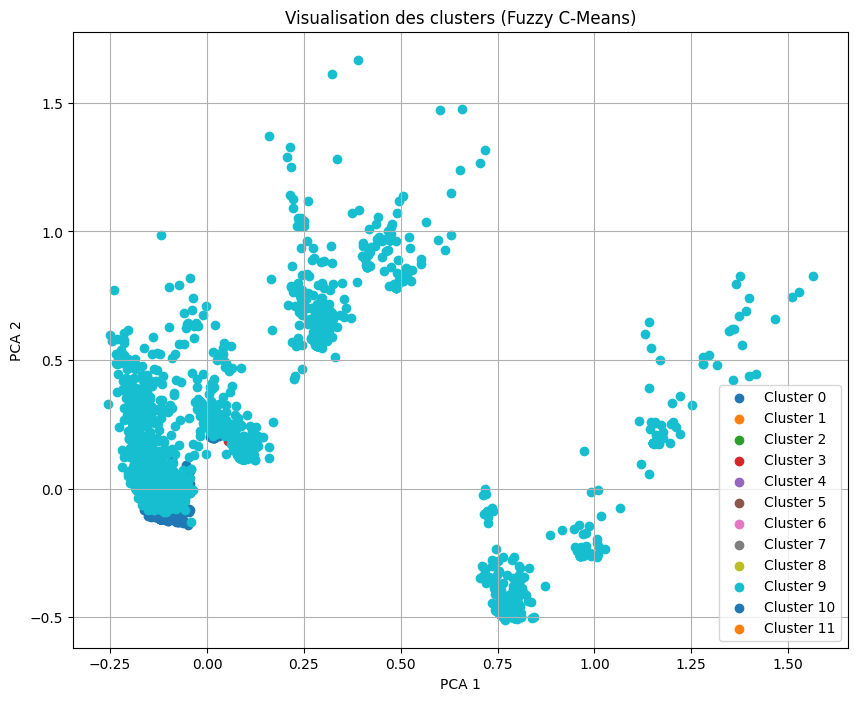

In [37]:
import skfuzzy as fuzz

# Appliquer Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=vectors.T,  # Les vecteurs doivent être transposés
    c=12,             # Nombre de clusters
    m=2,             # Paramètre de flou
    error=0.005,     # Seuil d'erreur
    maxiter=1000,    # Nombre maximal d'itérations
    seed=42
)

# Affecter chaque tweet au cluster avec la probabilité la plus élevée
data_subset['fuzzy_cluster'] = np.argmax(u, axis=0)

# Visualisation des clusters Fuzzy C-Means
plt.figure(figsize=(10, 8))
for cluster in range(12):  # Remplacez "5" par le nombre de clusters Fuzzy C-Means
    cluster_points = reduced_vectors[data_subset['fuzzy_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# Personnalisation de la courbe
plt.title("Visualisation des clusters (Fuzzy C-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()

<h3>Pour c=25</h3>

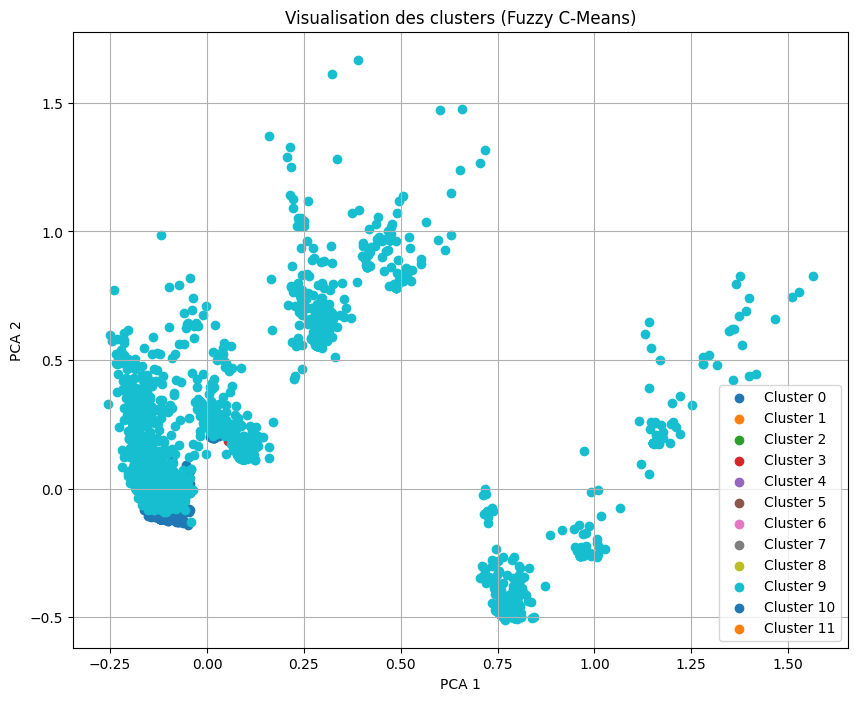

In [38]:
import skfuzzy as fuzz

# Appliquer Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=vectors.T,  # Les vecteurs doivent être transposés
    c=12,             # Nombre de clusters
    m=2,             # Paramètre de flou
    error=0.005,     # Seuil d'erreur
    maxiter=1000,    # Nombre maximal d'itérations
    seed=42
)

# Affecter chaque tweet au cluster avec la probabilité la plus élevée
data_subset['fuzzy_cluster'] = np.argmax(u, axis=0)

# Visualisation des clusters Fuzzy C-Means
plt.figure(figsize=(10, 8))
for cluster in range(12):  # Remplacez "5" par le nombre de clusters Fuzzy C-Means
    cluster_points = reduced_vectors[data_subset['fuzzy_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# Personnalisation de la courbe
plt.title("Visualisation des clusters (Fuzzy C-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()

In [35]:
import pandas as pd

# Utilisez le chemin absolu ou relatif de votre fichier
tweets_data = pd.read_csv("/kaggle/input/tweets-dataset/tweets.csv")
print(tweets_data.head())  # Afficher les premières lignes pour vérifier



      author                                            content country  \
0  katyperry  Is history repeating itself...?#DONTNORMALIZEH...     NaN   
1  katyperry  @barackobama Thank you for your incredible gra...     NaN   
2  katyperry                Life goals. https://t.co/XIn1qKMKQl     NaN   
3  katyperry            Me right now 🙏🏻 https://t.co/gW55C1wrwd     NaN   
4  katyperry  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...     NaN   

          date_time            id language  latitude  longitude  \
0  12/01/2017 19:52  8.196330e+17       en       NaN        NaN   
1  11/01/2017 08:38  8.191010e+17       en       NaN        NaN   
2  11/01/2017 02:52  8.190140e+17       en       NaN        NaN   
3  11/01/2017 02:44  8.190120e+17       en       NaN        NaN   
4  10/01/2017 05:22  8.186890e+17       en       NaN        NaN   

   number_of_likes  number_of_shares  
0             7900              3472  
1             3689              1380  
2            10341           

In [37]:
tweets_data = pd.read_csv("/kaggle/input/tweets-dataset/tweets.csv")


In [41]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')       # Tokenisation
nltk.download('stopwords')   # Stopwords

# Charger le dataset
tweets_data = pd.read_csv('/kaggle/input/tweets-dataset/tweets.csv')  # Assurez-vous que le chemin du fichier est correct

# Fonction pour nettoyer un tweet et le transformer en ensemble de mots
def preprocess_tweet(tweet):
    # Tokenisation du tweet
    tokens = word_tokenize(tweet.lower())  # Convertir en minuscules pour uniformité
    stop_words = set(stopwords.words('english'))  # Stopwords en anglais
    # Supprimer les stopwords et conserver les mots significatifs
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return set(filtered_tokens)  # Retourner un ensemble de mots

# Fonction pour calculer la distance de Jaccard entre deux tweets
def jaccard_distance(tweet1, tweet2):
    # Prétraiter les tweets
    tweet1_set = preprocess_tweet(tweet1)
    tweet2_set = preprocess_tweet(tweet2)
    # Calculer l'intersection et l'union des ensembles
    intersection = len(tweet1_set.intersection(tweet2_set))
    union = len(tweet1_set.union(tweet2_set))
    # Calculer la distance de Jaccard
    if union == 0:  # Eviter la division par zéro si l'union est vide
        return 0.0
    return intersection / union

# Exemple de calcul de la distance de Jaccard entre deux tweets dans le dataset
tweet1 = tweets_data['content'].iloc[0]  # Premier tweet
tweet2 = tweets_data['content'].iloc[1]  # Deuxième tweet

# Calculer la distance de Jaccard entre ces deux tweets
distance = jaccard_distance(tweet1, tweet2)
print(f"La distance de Jaccard entre le tweet 1 et le tweet 2 est : {distance}")

# Calculer la distance de Jaccard entre toutes les paires de tweets (par exemple)
# Exemple pour calculer les distances entre un sous-ensemble de tweets (5 premiers tweets)
for i in range(5):  # Limité à 5 premiers tweets pour l'exemple
    for j in range(i + 1, 5):
        tweet_i = tweets_data['content'].iloc[i]
        tweet_j = tweets_data['content'].iloc[j]
        distance = jaccard_distance(tweet_i, tweet_j)
        print(f"Distance de Jaccard entre tweet {i+1} et tweet {j+1}: {distance}")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
La distance de Jaccard entre le tweet 1 et le tweet 2 est : 0.1111111111111111
Distance de Jaccard entre tweet 1 et tweet 2: 0.1111111111111111
Distance de Jaccard entre tweet 1 et tweet 3: 0.16666666666666666
Distance de Jaccard entre tweet 1 et tweet 4: 0.2
Distance de Jaccard entre tweet 1 et tweet 5: 0.16666666666666666
Distance de Jaccard entre tweet 2 et tweet 3: 0.125
Distance de Jaccard entre tweet 2 et tweet 4: 0.14285714285714285
Distance de Jaccard entre tweet 2 et tweet 5: 0.125
Distance de Jaccard entre tweet 3 et tweet 4: 0.25
Distance de Jaccard entre tweet 3 et tweet 5: 0.2
Distance de Jaccard entre tweet 4 et tweet 5: 0.25


In [28]:
# Exemple de code pour calculer la distance de Jaccard
def jaccard_distance(tweet1, tweet2):
    # Prétraitement et calcul de la distance
    ...
    return intersection / union


<h3>Choisir un tweet par cluster pour K-Means</h3>

In [39]:
import numpy as np

# Fonction pour trouver l'index du tweet le plus proche du centroïde
def get_representative_tweets(vectors, labels, centroids):
    representative_tweets = {}
    for cluster in range(len(centroids)):
        # Trouver les indices des tweets appartenant à ce cluster
        cluster_indices = np.where(labels == cluster)[0]
        # Calculer les distances des tweets au centroïde du cluster
        distances = np.linalg.norm(vectors[cluster_indices] - centroids[cluster], axis=1)
        # Trouver l'index du tweet le plus proche
        closest_index = cluster_indices[np.argmin(distances)]
        representative_tweets[cluster] = closest_index
    return representative_tweets

# Trouver les centroïdes et les labels des tweets
labels_kmeans = data_subset['cluster'].values
centroids_kmeans = kmeans.cluster_centers_

# Obtenir les indices des tweets représentatifs
representative_tweets_kmeans = get_representative_tweets(vectors, labels_kmeans, centroids_kmeans)

# Afficher les tweets représentatifs
print("Tweets représentatifs pour K-Means :")
for cluster, index in representative_tweets_kmeans.items():
    print(f"Cluster {cluster}: {data_subset.iloc[index]['cleaned_text']}")

Tweets représentatifs pour K-Means :
Cluster 0: same 
Cluster 1: and tonight 
Cluster 2: honestly ima bit turnt tryna go to the club in miami but i dont know anyone at the club amp everyone in my car is sleeping  
Cluster 3: happy   
Cluster 4: lol  
Cluster 5: the album 
Cluster 6: do you like 
Cluster 7: whos staying up late tonight for another  walking on air comes out at midnight edt i bet it will make your pony tail twirl
Cluster 8: shout out to all the kiwis new zealand wanna thank u for making amazing chart history today cant wait to bungee ur bridge again 
Cluster 9:  days until 


<h3>Choisir un tweet par cluster pour Fuzzy C-Means</h3>

In [40]:
# Trouver le tweet avec la probabilité la plus élevée pour chaque cluster
def get_representative_tweets_fuzzy(u, data_subset):
    representative_tweets = {}
    for cluster in range(u.shape[0]):
        # Trouver l'index du tweet avec la probabilité maximale pour ce cluster
        closest_index = np.argmax(u[cluster])
        representative_tweets[cluster] = closest_index
    return representative_tweets

# Obtenir les indices des tweets représentatifs pour Fuzzy C-Means
representative_tweets_fuzzy = get_representative_tweets_fuzzy(u, data_subset)

# Afficher les tweets représentatifs
print("\nTweets représentatifs pour Fuzzy C-Means :")
for cluster, index in representative_tweets_fuzzy.items():
    print(f"Cluster {cluster}: {data_subset.iloc[index]['cleaned_text']}")


Tweets représentatifs pour Fuzzy C-Means :
Cluster 0: same 
Cluster 1: same 
Cluster 2: same 
Cluster 3: thank u 
Cluster 4: thank u 
Cluster 5: thank u 
Cluster 6: same 
Cluster 7: thank u 
Cluster 8: thank u 
Cluster 9: thank u 
Cluster 10: thank u 
Cluster 11: thank u 
